# Homework 4 (Due on Blackboard before class on Tue. 2/6)

**Name:** Jesse Weiss

You must use Jupyter notebook to complete homework 2 and submit it as a .ipynb file on Blackboard. This is to have you practice writing notebooks using markdown and code. For a tutorial on markdown, see: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet. If you use code to solve for the final answer, please give your answer as part of a print statement that explains what the number means. Example: `print('Probability that X=5 is', prob)`. See these tutorials for how to nicely format output: https://www.digitalocean.com/community/tutorials/how-to-use-string-formatters-in-python-3 and https://www.programiz.com/python-programming/methods/string/format.

In [34]:
import math
import numpy as np
from scipy.stats import binom
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

## Question 1
(DMD Exercise 2.22) This question begins with the text "A large retail company has stores at two locations in a city..." To solve this question, you would have to use the formula in DMD Section 2.11.



Q: Compute the mean, variance and standard deviation of the total (combined) umbrella sales revenue form the 2 stores

In [9]:
mu_x, sd_x, price_x = 147.8, 51, 17
mu_y, sd_y, price_y = 63.2, 37, 9
corr_xy = .7

cov_xy = corr_xy * sd_x * sd_y

mean_revenue = mu_x * price_x + mu_y + price_y
var_revenue = price_x**2 * sd_x**2 + price_y**2 *sd_y**2 + 2*price_x*price_y*cov_xy
sd_revenue = math.sqrt(var_revenue)

print('Combined mean revenue is {0:.3f}'.format(mean_revenue))
print('Combined revenue variance is {0:.3f}'.format(var_revenue))
print('Combined revenue standard deviation is {0:.3f}'.format(sd_revenue))

Combined mean revenue is 2584.800
Combined revenue variance is 1266773.400
Combined revenue standard deviation is 1125.510


## Question 2
(DMD Exercise 2.25) This question begins with the text "Suppose a fraction 5% of the microchips produced by a leading microchip manufacturer are defective."

$P(Defective) = .05$<br/>
$P(Accept|Defective) = .1$<br/>
$P(Accept|Not Defective) =1$<br/>

<ol>
<li>What is the prob that all 10 chips are not defective</l1>
<li>What is the prob that the inspector accepts a particular chip</li>
<li>What is the prob that the inspector accepts 9/10 chips</li>
<li>Given a chip is accepted, what is the prob it has no defect</li>
<li>Given all 10 are accepted, what is the prob that all have no defects</li>
</ol>

In [13]:
prob_table = {'': ['accept','reject','p_defect'],
             'defective': [.05 * .1, .05 * .9, .05],
             'not_defective': [.95 , 0, .95],
             'p_inpect': [.05*.1 + .95, .05*.9, 1]}

pd.DataFrame(OrderedDict(prob_table)).set_index('')

,defective,not_defective,p_inpect
,,,
accept,0.005,0.95,0.955
reject,0.045,0.00,0.045
p_defect,0.050,0.95,1.000


In [21]:
q1 = .95**10
q2 = .955
q3 = .955**9 * .045
q4 = .95/.955
q5 = (.95/.995)**10

print('1. {0:.3f} \n2. {1:.3f} \n3. {2:.3f} \n4. {3:.3f} \n5. {4:.3f}'.format(q1,q2,q3,q4,q5))

1. 0.599 
2. 0.955 
3. 0.030 
4. 0.995 
5. 0.630


## Question 3
(DMD Exercise 2.27) This question begins with the text "In this exercise we examine the effects of overbooking in the airline industry."

$P(No Show) = .2$

In [62]:
dist = binom(n=11, p = .8)

q1 = dist.cdf(5)
q2 = dist.pmf(10)

q3_vals = []
for num_pas in range(12):
    prob = dist.pmf(num_pas)
    if num_pas != 11:
        q3_vals.append(prob * num_pas * 1200)
    else:
        q3_vals.append(prob * 10 * 1200 - 3000)
q3 = sum(q3_vals)

In [63]:
q3

7456.9207848960086

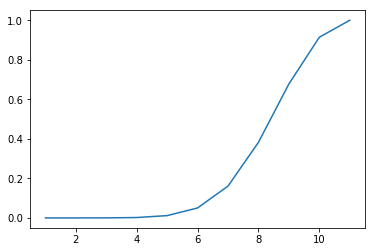

In [53]:
x = [1,2,3,4,5,6,7,8,9,10,11]
y = []
for i in x:
    y.append(dist.cdf(i))
    
plt.plot(x,y)
plt.show()

## Question 4 
This question asks you to illustrate the Central Limit Theorem using Python plots.

a) (Coding DMD Example 3.11 in Section 3.7) Create python code that plots the 3 plots in Figure 3.14.

b) (Coding DMD Example 3.12 in Section 3.7) Create python code that plots the 4 plots in Figure 3.15.

## Question 5
(DMD Exercise 3.2) This question begins with the text "The men's 100 meter sprint at the 1996 Olympic Games..."

## Question 6
(DMD Exercise 3.6) This question begins with the text "Winter lasts from December 21 through March 21..."

## Question 7
(DMD Exercise 3.12) This question begins with the text "A portfolio manager believes that tomorrow's foreign exchange rate of German marks per U.S. dollar will be Normally distributed..."

## Question 8
(DMD Exercise 3.18) This question begins with the text "In 1996, after an extensive investigation by the Consumer Product Safety Commission..."

## Question 9
Choose one continuous probability distribution and one discrete probability distribution in the `scipy.stats` library that we didn't discuss in class. See the scipy.stats documentation: https://docs.scipy.org/doc/scipy/reference/stats.html

For each of the two distributions, read the documentation above and Wikipedia the distribution. Then describe one example in your life or in your future career in which this distribution may be used to model an uncertainty. (If you can't find an example, choose another distribution.) Illustrate each application using reasonable parameters you choose, and plot the PMF or PDF of the distribution as well as a histogram of 100 samples. Write one sentence to summarize an insight from looking at the histogram or the PMF/PDF that may be helpful for the application you chose.